Command replay allows you to replicate exactly what stimulus you displayed

In [ ]:
# library imports
from matplotlib import pyplot as plt

# Load PGL libraries and start a PGL window
from pgl import pgl as pglLibrary
pgl = pglLibrary()

# close any existing windows
pgl.cleanUp()

# open a new window
pgl.open(0,800,600)
pgl.visualAngle(57, 60, 40)

================================ pglBase: init =================================
(pgl:checkOS) Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]
(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 26.2
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 4 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display) GammaTable size: 1024
(pglBase) Main library instance created
(pglBase:shutdownAll) Shutting down mglMetal process: 50057
(pglBase:removeOrphanedSockets) Removing orphaned socket: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.20260131_101430.Uje97bZoFx
(pglBase:removeOrphanedSockets) Removed 1 orphaned sockets
================================= pglBase:open =================================
(pglBase:open) Starting mglMetal application: /Users/justin/Libra

Saving the commands that display to the screen allows you to exactly replicate the stimulus sequence again. For example, we will draw some random dots, recording each command that goes to the stimulus display. Playing those commands again will draw *exactly* the same stimulus

In [ ]:
# start command recording, so we can replay the stimulus exactly later
pgl.commandRecord()

# Init a random dot kinematogram stimulus
rdk = pgl.randomDots(width=10, height=10, noiseType='movshon')

# print the stimulus object
print(rdk)

# display duration in second
duration = 2
startTime = pgl.getSecs()

# display the stimulus
while pgl.getSecs() - startTime < duration:
    rdk.display(direction=181, coherence=1, speed=7.0)
    pgl.flush()
    
# stop command recording
pgl.commandRecordStop()

<pglStimulusRandomDot: 1000 dots, size=0.1, shape=1, aperture=elliptical>
(pglCommandReplayer) Recorded 482 pgl commands.


Now let's replay them

In [3]:
pgl.commandReplay()

You can also list the commands that were played

In [4]:
pgl.commandList()

Command 0: mglDots (Value: 1005, Data length: 3)
Command 1: mglFlush (Value: 1001, Data length: 1)
Command 2: mglDots (Value: 1005, Data length: 3)
Command 3: mglFlush (Value: 1001, Data length: 1)
Command 4: mglDots (Value: 1005, Data length: 3)
Command 5: mglFlush (Value: 1001, Data length: 1)
Command 6: mglDots (Value: 1005, Data length: 3)
Command 7: mglFlush (Value: 1001, Data length: 1)
Command 8: mglDots (Value: 1005, Data length: 3)
Command 9: mglFlush (Value: 1001, Data length: 1)
Command 10: mglDots (Value: 1005, Data length: 3)
Command 11: mglFlush (Value: 1001, Data length: 1)
Command 12: mglDots (Value: 1005, Data length: 3)
Command 13: mglFlush (Value: 1001, Data length: 1)
Command 14: mglDots (Value: 1005, Data length: 3)
Command 15: mglFlush (Value: 1001, Data length: 1)
Command 16: mglDots (Value: 1005, Data length: 3)
Command 17: mglFlush (Value: 1001, Data length: 1)
Command 18: mglDots (Value: 1005, Data length: 3)
Command 19: mglFlush (Value: 1001, Data length: 1)


Grab a frame. (Fix, this seems to now be broken, possibly due to changing to new way of sequencing frame updates in the metal app)

(pglImage:setRenderTarget) Setting render target to image 1 (800x600)
(600, 800, 4)
(pglImage:setRenderTarget) Resetting render target to screen.
(pglImage:imageDelete) Deleting image 1 (800x600)
(pglImage:imageDelete) Deleting image 1 (800x600)


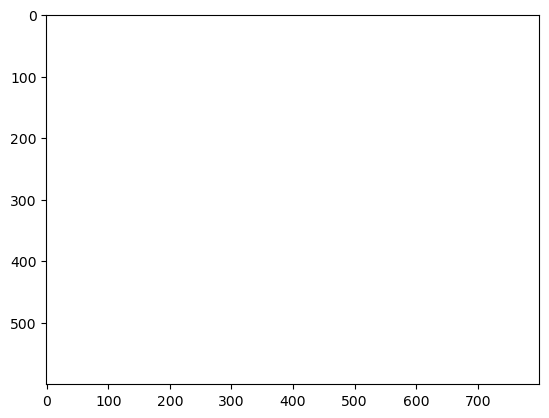

In [4]:
#pgl.verbose=1
pgl.frameGrabInit()
checkerboard = pgl.checkerboard(width=1)
checkerboard.display()
pgl.flush()

x = pgl.frameGrab()
print(x.shape)
plt.imshow(x[:,:,:])
pgl.frameGrabEnd()
#print(x[:,:,3])